In [33]:
import pandas as pd

df_numeric = pd.read_csv('train_numeric_sample.csv')
#test = pd.read_csv('test_numeric_sample.csv')
#df.convert_objects(convert_numeric=True).dtypes


In [35]:
df_numeric.set_index(df_numeric["Id"],inplace=True)
#test.set_index(test["Id"],inplace=True)
df_numeric.head()

,Unnamed: 0,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
Id,,,,,,,,,,,,,,,,,,,,,
632173,315972,632173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1683751,841903,1683751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1269884,634444,1269884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
452561,226376,452561,-0.003,-0.011,-0.161,-0.161,0.031,0.206,-0.015,-0.072,...,0.0,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,0.0,0
1290622,644813,1290622,-0.016,-0.034,-0.215,-0.161,0.118,0.070,-0.007,-0.032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [36]:
#Drop unnecessary first column 

df_numeric = df_numeric.drop('Unnamed: 0', 1)
df_numeric = df_numeric.drop('Id', 1)

#Same for test
#test = test.drop('Unnamed: 0', 1)
#test = test.drop('Id', 1)

In [37]:
#Nulls by column
print len(df_numeric.index)
#df.ix['nulls'] = df.isnull().sum().T


#How many columns are more than half blank
half_empty = df_numeric.isnull().sum() > 25000
print sum(half_empty)  #812 columns are more than half empty......

print df_numeric.shape

#Add a column with the number of null values per row
df_numeric['null_cols'] = df_numeric.count(axis=1)

#Do same for test
#test['null_cols'] = test.count(axis=1)

print df_numeric['null_cols'].unique()

# Number of unique blank columns should indicate the line pattern or part route
print len(df_numeric['null_cols'].unique())

50000
812
(50000, 969)
[208 193 111 160 211 176 191 212 159 173 113 161 221 194 163 165 156 205
 158 210 192 167 207 162 125 179 204 119 175 209 178 196  68 170 217 182
 240 168 188 190 131 100   1 266 222 116  35 153 123 172 202 128 251 203
 164 197 206 127 199 117 228 189 195  49 150 139 180 200  47 155 157 187
 237 146 109 254 214 174 171 246 264 149 166 184 225 248 223 183 226 114
 147 177 137 181 145 144  90 198 256  64 213 121 130 270 154 126 236 224
 148  80 243 185 133 215  86  67 129   4 261 102 253 169 143 186 216 152
 257 120 201 141  55  63  87 219 233 231 112 107  50 122  99 220 255 105
 151  45 227 134 250 103  95 230 142 229 242 271 140 260 241 239]
160


# Fill in NA values

In [38]:
df_numeric.fillna(0,inplace=True)

#test.fillna(0,inplace=True)  

y_train = df_numeric['Response']
null_cols = pd.DataFrame(df_numeric['null_cols'])
#df = df.drop('Response',axis=1)
#df = df.drop('null_cols',axis=1)

## Center Only don't kill sparsity

stdev = df.std(axis=1)
print df.columns

count = 0
for i in df.columns:
    df[i] = df[i].values/stdev[count]
    count += 1
    


## Null columns and part route investigation

In [39]:
df_numeric.sort_values(by='null_cols',inplace=True)

In [40]:
print df_numeric.Response[df['Response'].values !=0]


Id
518403     0
75065      0
1353494    0
863445     0
1610586    0
1468091    0
2124261    0
188326     0
589516     0
1064567    0
514710     0
1534639    0
595893     0
1680409    0
1284058    0
978830     0
718529     0
736138     0
Name: Response, dtype: int64


C:\Users\anura\Anaconda2\lib\site-packages\pandas\core\internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 2530
  return self.values[slicer]
C:\Users\anura\Anaconda2\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 2530
  result = getitem(key)


## Class Imbalance Methods
 
### We have to be careful here, because any resampling or undersampling we train on will be expected in the test set. Thus if we use a sampling method during train, we'll need to use it during the test as well.

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.imblearn as imb
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
#from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

In [74]:
x_1 = df_numeric.drop('Response',axis=1)
y_1 = df_numeric['Response']
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(x_1,y_1,test_size = 0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_list_1 = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list_1:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [73]:
len(X_train)

35000

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

accuracy_train_1 = {}
accuracy_test_1 = {}
cm_1 = {}
mcc_1={}
TPR_1={}
for (name, model) in model_list_1:
    prediction_train_1 = model.predict(X_train)
    accuracy_train_1[name] = metrics.accuracy_score(y_train, prediction_train_1)
    prediction_test_1 = model.predict(X_test)
    accuracy_test_1[name] = metrics.accuracy_score(y_test, prediction_test_1)
    cm_1[name] = confusion_matrix(y_test,prediction_test_1)
    TP = cm_1[name][1][1]
    FP = cm_1[name][0][1]
    TN = cm_1[name][0][0]
    FN = cm_1[name][1][0]
    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc_1[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR_1[name] = TP*1.0/(TP+FN)
print cm
results_1 = pd.DataFrame({'Training Accuracy':accuracy_train_1, 'Test Accuracy':accuracy_test_1,'MCC':mcc_1,'TPR':TPR_1})
results_1

{}


,MCC,TPR,Test Accuracy,Training Accuracy
Bagging,0.244757,0.060345,0.992733,0.998543
Decision Tree,0.063067,0.068966,0.985867,0.999971
Gradient Boosting,0.075169,0.077586,0.986533,0.999286
Random Forest,0.188534,0.043103,0.992533,0.998486


In [35]:
type(cm1)

numpy.ndarray

In [27]:
'cm_'+str(name)

'cm_Gradient Boosting'

## Random Undersampling

In [42]:
#Random undersampling
#Sample shape (50000, 969)

posidx = df_numeric[df_numeric.Response == 1].index
negidx = df_numeric[df_numeric.Response == 0].index

pos = len(posidx)
neg = len(negidx)

print "positive class samples  " + str(pos)
print 'neg class samples  ' + str(neg)

random_indices = np.random.choice(negidx, pos , replace=False)
undersample = pd.DataFrame(df_numeric.loc[random_indices])
possample = pd.DataFrame(df_numeric.loc[posidx])

#print undersample.head()
#print possample.head()

frames = [undersample, possample]
train_undersample_random = pd.concat(frames, axis=0)

print len(train_undersample_random)

x = train_undersample_random.ix[:,train_undersample_random.columns != 'Response']
y = train_undersample_random.ix[:,'Response']




positive class samples  317
neg class samples  49683
634


In [74]:
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

In [75]:
len(X_train)

443

In [84]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, confusion_matrix

# All the models we want to test out, in one list.
model_list_2 = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list_2:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [85]:

from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

In [86]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
cm = {}
mcc={}
TPR={}
for (name, model) in model_list_2:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    cm[name] = confusion_matrix(y_test,prediction_test)
    TP = cm[name][1][1]
    FP = cm[name][0][1]
    TN = cm[name][0][0]
    FN = cm[name][1][0]

    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR[name] = TP*1.0/(TP+FN)
print cm
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,'MCC':mcc,'TPR':TPR})
results

{'Bagging': array([[73, 27],
       [55, 36]]), 'Random Forest': array([[71, 29],
       [52, 39]]), 'Gradient Boosting': array([[59, 41],
       [36, 55]]), 'Decision Tree': array([[50, 50],
       [46, 45]])}


,MCC,TPR,Test Accuracy,Training Accuracy
Bagging,0.133429,0.395604,0.570681,0.981941
Decision Tree,-0.005488,0.494505,0.497382,1.000000
Gradient Boosting,0.194182,0.604396,0.596859,1.000000
Random Forest,0.144540,0.428571,0.575916,0.979684


## Oversampling - Smote

In [90]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

x = df_numeric.ix[:,df.columns != 'Response']
y = df_numeric.ix[:,df.columns == 'Response']
y = y.values.ravel()
# Apply regular SMOTE
sm = SMOTE(kind='regular')
X_resampled, y_resampled = sm.fit_sample(x,y)
print len(X_resampled)
#y_resampled = pd.DataFrame(y_resampled)
print X_resampled.shape
print y_resampled.shape

99366
(99366L, 969L)
(99366L,)


In [91]:
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.3, random_state=42)

In [92]:
# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [93]:
accuracy_train = {}
accuracy_test = {}
cm = {}
mcc={}
TPR={}
for (name, model) in model_list_2:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    cm[name] = confusion_matrix(y_test,prediction_test)
    TP = cm[name][1][1]
    FP = cm[name][0][1]
    TN = cm[name][0][0]
    FN = cm[name][1][0]

    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR[name] = TP*1.0/(TP+FN)
print cm
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,'MCC':mcc,'TPR':TPR})
results

{'Bagging': array([[ 9789,  5153],
       [ 4108, 10760]]), 'Random Forest': array([[ 9821,  5121],
       [ 3492, 11376]]), 'Gradient Boosting': array([[ 8791,  6151],
       [ 1599, 13269]]), 'Decision Tree': array([[ 8382,  6560],
       [ 3434, 11434]])}


,MCC,TPR,Test Accuracy,Training Accuracy
Bagging,0.379703,0.723702,0.689332,0.683938
Decision Tree,0.337326,0.769034,0.664743,0.666671
Gradient Boosting,0.504497,0.892454,0.740020,0.739462
Random Forest,0.424837,0.765133,0.711070,0.712821


## Combine Class methods SMOTE + ENN

In [94]:
from imblearn.combine import SMOTEENN

x = df_numeric.ix[:,df_numeric.columns != 'Response']
y = df_numeric.ix[:,df_numeric.columns == 'Response']
y = y.values.ravel()
print x.shape
print y.shape

# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(x, y)

print X_resampled.shape
print y_resampled.shape
#print X_resampled.head()


C:\Users\anura\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(50000, 969)
(50000L,)
(99350L, 969L)
(99350L,)


In [95]:
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.3, random_state=42)

In [26]:
# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [96]:
accuracy_train = {}
accuracy_test = {}
cm = {}
mcc={}
TPR={}
for (name, model) in model_list_2:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    cm[name] = confusion_matrix(y_test,prediction_test)
    TP = cm[name][1][1]
    FP = cm[name][0][1]
    TN = cm[name][0][0]
    FN = cm[name][1][0]

    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR[name] = TP*1.0/(TP+FN)
print cm
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,'MCC':mcc,'TPR':TPR})
results

{'Bagging': array([[ 9755,  5198],
       [ 4215, 10637]]), 'Random Forest': array([[ 9882,  5071],
       [ 3494, 11358]]), 'Gradient Boosting': array([[ 8760,  6193],
       [ 1595, 13257]]), 'Decision Tree': array([[ 8294,  6659],
       [ 3502, 11350]])}


,MCC,TPR,Test Accuracy,Training Accuracy
Bagging,0.369299,0.716200,0.684181,0.684708
Decision Tree,0.326039,0.764207,0.659084,0.668143
Gradient Boosting,0.502402,0.892607,0.738702,0.741434
Random Forest,0.427864,0.764745,0.712632,0.712345


## Smote & Tomek

In [97]:
from imblearn.combine import SMOTETomek

x = df_numeric.ix[:,df_numeric.columns != 'Response']
y = df_numeric.ix[:,df_numeric.columns == 'Response']
y = y.values.ravel()
print x.shape
print y.shape

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(x, y)

print X_resampled.shape
print y_resampled.shape
#print X_resampled.head()


(50000, 969)
(50000L,)
(99365L, 969L)
(99365L,)


In [130]:
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.3, random_state=42)

# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)

accuracy_train = {}
accuracy_test = {}
cm = {}
mcc={}
TPR={}
for (name, model) in model_list_2:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    cm[name] = confusion_matrix(y_test,prediction_test)
    TP = cm[name][1][1]
    FP = cm[name][0][1]
    TN = cm[name][0][0]
    FN = cm[name][1][0]

    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR[name] = TP*1.0/(TP+FN)
print cm
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,'MCC':mcc,'TPR':TPR})
results

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


NameError: name 'model_list_2' is not defined

# Model Using ensemble methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, confusion_matrix

# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)


In [ ]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
results

# Random undersampling
#Test Accuracy	Training Accuracy
#Bagging	0.617801	0.988713
#Decision Tree	0.575916	1.000000
#Gradient Boosting	0.602094	1.000000
#Random Forest	0.570681	0.993228

In [ ]:
import itertools
cm = confusion_matrix(y_train,prediction_train)
np.set_printoptions(precision=3)
class_names = ['defect','ok']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
%pylab inline
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
pd.Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

In [ ]:
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=100, max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
pd.Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

In [ ]:
from sklearn.metrics import precision_recall_curve

for index, (name, model) in enumerate(model_list):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

In [4]:
train_date = pd.read_csv('train_date_response.csv')
del train_date[train_date.columns[0]]
train_date.head()

,Id,Response,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,632173,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1683751,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1269884,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452561,0,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,...,1377.4,1377.4,1377.4,1377.4,1377.4,1377.41,1377.41,1377.41,1377.41,1377.41
4,1290622,0,104.16,104.16,104.16,104.16,104.16,104.16,104.16,104.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_date = pd.read_csv('train_date_response.csv')
del train_date[train_date.columns[0]]
train_date.head()

,Id,Response,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,632173,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1683751,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1269884,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452561,0,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,1375.86,...,1377.4,1377.4,1377.4,1377.4,1377.4,1377.41,1377.41,1377.41,1377.41,1377.41
4,1290622,0,104.16,104.16,104.16,104.16,104.16,104.16,104.16,104.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = train_date.drop(['Id','Response'],1)
df = train_date[['Id','Response']]

In [7]:
train_date['Detection Frequency'] = train_date.count(axis=1)-2

In [8]:
fail = train_date[train_date['Response'] == 1]
success = train_date[train_date['Response'] == 0]

In [9]:
features = data.columns.values

def orgainize(features):
    line_features = {}
    station_features = {}
    lines = set([f.split('_')[0] for f in features])
    stations = set([f.split('_')[1] for f in features])
    
    for l in lines:
        line_features[l] = [f for f in features if l+'_' in f]
        
    for s in stations:
        station_features[s] = [f for f in features if s+'_' in f]
                    
    return line_features, station_features

line_features, station_features = orgainize(features)

In [10]:
station_error = []
for s in station_features:
    cols = ['Id','Response']
    cols.extend(station_features[s])
    df = pd.read_csv('train_date_response.csv', usecols=cols).dropna()
    error_rate = df[df.Response == 1].size / float(df[df.Response == 0].size)   
    station_error.append([df.shape[1]-2, df.shape[0], error_rate]) 

station_data = pd.DataFrame(station_error, 
                         columns=['Features', 'Samples', 'Error_Rate'], 
                         index=station_features).sort_index()
station_data

,Features,Samples,Error_Rate
S0,12,28385,0.005633
S1,2,28397,0.005631
S10,13,9439,0.005754
S11,13,9501,0.005929
S12,12,10236,0.006886
S13,2,10236,0.006886
S14,9,5125,0.006086
S15,9,5114,0.007685
S16,2,5053,0.006975
S17,2,5186,0.006795


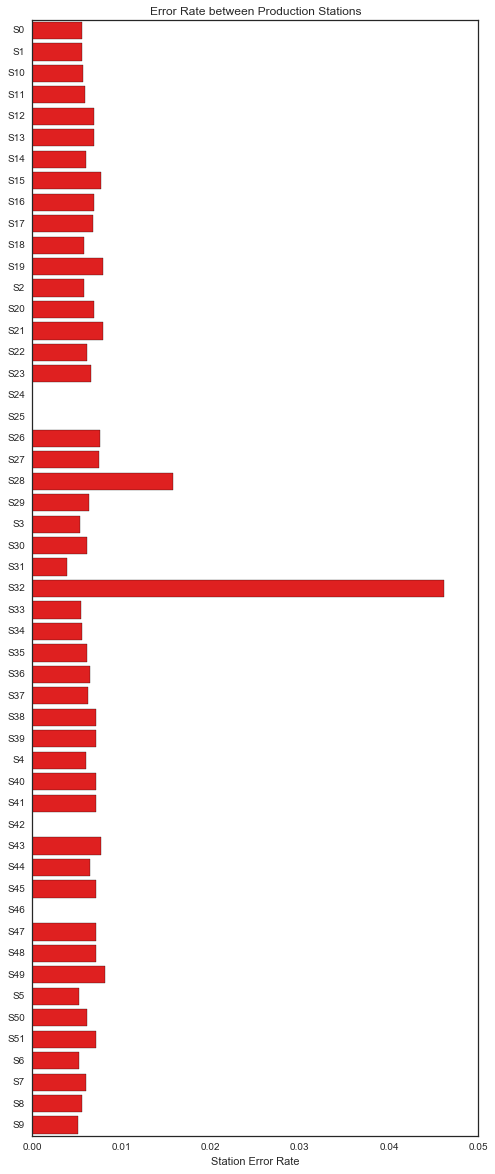

In [11]:
plt.figure(figsize=(8, 20))
sns.barplot(x='Error_Rate', y=station_data.index.values, data=station_data, color="red")
plt.title('Error Rate between Production Stations')

plt.xlabel('Station Error Rate')
plt.show()

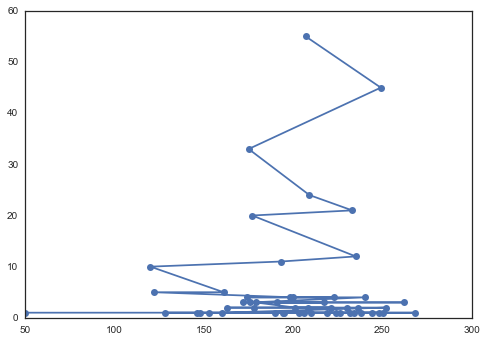

In [12]:
x = fail['Detection Frequency'].value_counts().index
y = fail['Detection Frequency'].value_counts().values

plt.plot(x,y,marker='o')

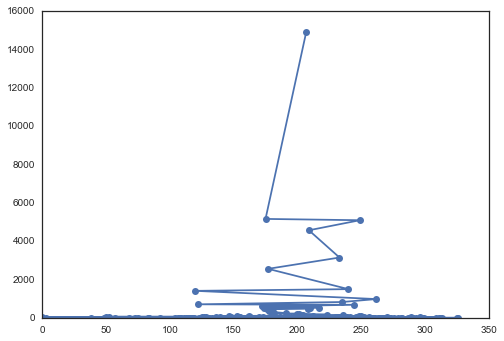

In [13]:
x = success['Detection Frequency'].value_counts().index
y = success['Detection Frequency'].value_counts().values

plt.plot(x,y,marker='o')

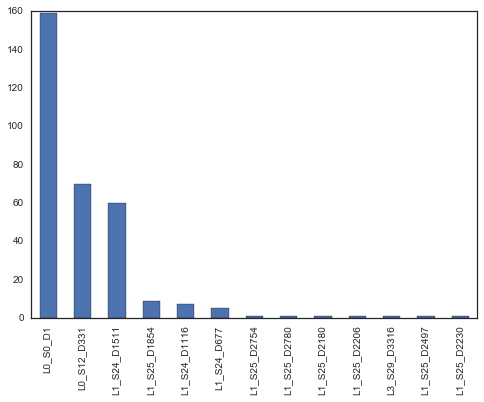

In [15]:
def first_cp(x):
    ''' Get the first non-NaN value per row'''
    if x.first_valid_index() is None:
        return None
    else:
        return x.first_valid_index()
    
fail.drop(['Id','Response'],1).apply(first_cp, axis=1).value_counts().plot(kind='bar')

In [16]:
success.drop(['Id','Response'],1).apply(first_cp, axis=1).value_counts()/len(success)

L0_S0_D1               0.568122
L0_S12_D331            0.203993
L1_S24_D1511           0.109092
L1_S25_D1854           0.045448
L1_S24_D1116           0.023449
L1_S24_D677            0.021355
L1_S25_D2471           0.008655
L1_S25_D2230           0.005012
L1_S25_D2206           0.003200
L1_S25_D2780           0.003120
L3_S29_D3316           0.001932
L1_S25_D2754           0.001852
L1_S25_D2497           0.001429
L1_S25_D2180           0.000966
L0_S1_D26              0.000704
Detection Frequency    0.000503
L2_S27_D3130           0.000503
L3_S39_D3966           0.000242
L2_S28_D3223           0.000181
L3_S38_D3953           0.000101
L2_S26_D3037           0.000060
L0_S18_D437            0.000020
L0_S16_D423            0.000020
L0_S2_D34              0.000020
L1_S25_D1867           0.000020
dtype: float64

In [17]:
fail.drop(['Id','Response'],1).apply(first_cp, axis=1).value_counts()/len(fail)

L0_S0_D1        0.501577
L0_S12_D331     0.220820
L1_S24_D1511    0.189274
L1_S25_D1854    0.028391
L1_S24_D1116    0.022082
L1_S24_D677     0.015773
L1_S25_D2754    0.003155
L1_S25_D2780    0.003155
L1_S25_D2180    0.003155
L1_S25_D2206    0.003155
L3_S29_D3316    0.003155
L1_S25_D2497    0.003155
L1_S25_D2230    0.003155
dtype: float64

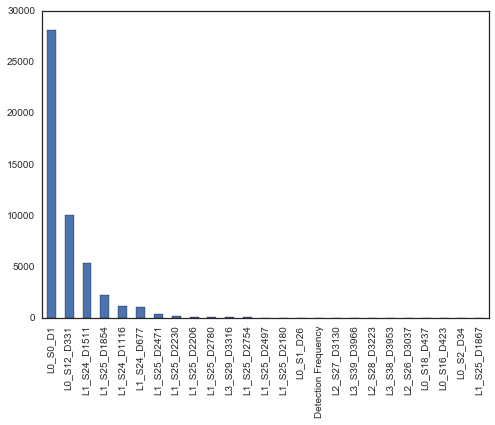

In [18]:
success.drop(['Id','Response'],1).apply(first_cp, axis=1).value_counts().plot(kind='bar')

In [19]:
def first_valid(x):
    ''' Get the first non-NaN value per row'''
    if x.first_valid_index() is None:
        return None
    else:
        return x[x.first_valid_index()]
    
def last_valid(x):
    ''' Get the last non-NaN value per row'''
    if x.last_valid_index() is None:
        return None
    else:
        return x[x.last_valid_index()]

start_time = data.apply(first_valid, axis=1)
end_time = data.apply(last_valid, axis=1)

In [79]:
train_date = pd.read_csv('train_date_response.csv')
del train_date[train_date.columns[0]]
train_date['Detection Frequency'] = train_date.count(axis=1)-2

#train_numeric = pd.read_csv('train_numeric.csv')

df = train_date[['Id','Response','Detection Frequency']]
data = train_date.drop(['Id','Response','Detection Frequency'],1)


def first_valid(x):
   ''' Get the first non-NaN value per row'''
   if x.first_valid_index() is None:
       return None
   else:
       return x[x.first_valid_index()]
   
def last_valid(x):
   ''' Get the last non-NaN value per row'''
   if x.last_valid_index() is None:
       return None
   else:
       return x[x.last_valid_index()]

start_time = data.apply(first_valid, axis=1)
end_time = data.apply(last_valid, axis=1)

timestamp = pd.concat([df, start_time, end_time], axis=1, keys=['red','blue','yellow'])
timestamp.columns = ['Id','Response','Detection Frequency','Start_time','End_time']
timestamp['Duration'] = timestamp['End_time'] - timestamp['Start_time']



,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,null_cols,Duration
72,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,193,7.79
79,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,161,2.54
159,-0.049,0.011,-0.033,0.003,0.031,0.116,0.015,-0.032,0.0,-0.056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,205,4.29
165,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,193,1.80
166,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,166,7.32


In [108]:
df_numeric.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,null_cols
Id,,,,,,,,,,,,,,,,,,,,,
206567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
499248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2047971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1431582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1242241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [109]:
df_merged=pd.merge(df_numeric,timestamp[['Id','Duration']],how='inner',left_index=True,right_on='Id')

In [110]:
np.sum(df_merged['Response'])

317L

In [127]:
from imblearn.combine import SMOTETomek
df_merged=df_merged.fillna(0)
x = df_merged.ix[:,df_merged.columns != 'Response']
y = df_merged.ix[:,df_merged.columns == 'Response']
y = y.values.ravel()
print x.shape
print y.shape

(50000, 971)
(50000L,)


In [128]:
# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(x, y)

print X_resampled.shape
print y_resampled.shape
#print X_resampled.head()

(90775L, 971L)
(90775L,)


In [129]:
from sklearn.model_selection import (train_test_split,KFold)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.3, random_state=42)

# All the models we want to test out, in one list.
model_list5 = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

for (name, model) in model_list5:
    print 'Fitting', name
    model.fit(X_train, y_train)

accuracy_train = {}
accuracy_test = {}
cm = {}
mcc={}
TPR={}
for (name, model) in model_list5:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    cm[name] = confusion_matrix(y_test,prediction_test)
    TP = cm[name][1][1]
    FP = cm[name][0][1]
    TN = cm[name][0][0]
    FN = cm[name][1][0]

    #print (TP+FP),(TP+FN),(TN+FP),(TN+FN)
    a = (TP+FP)*(TP+FN)
    b = (TN+FP)*(TN+FN)
    mcc[name]= (TP*TN-FP*FN)*1.0/np.sqrt(float(a)*float(b))
    TPR[name] = TP*1.0/(TP+FN)
print cm
results = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test,'MCC':mcc,'TPR':TPR})
results

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting
{'Bagging': array([[14940,    18],
       [   87, 12188]]), 'Random Forest': array([[14958,     0],
       [   88, 12187]]), 'Gradient Boosting': array([[14944,    14],
       [   76, 12199]]), 'Decision Tree': array([[14823,   135],
       [   86, 12189]])}


,MCC,TPR,Test Accuracy,Training Accuracy
Bagging,0.992222,0.992912,0.996144,0.999182
Decision Tree,0.983623,0.992994,0.991885,1.000000
Gradient Boosting,0.993333,0.993809,0.996695,0.997655
Random Forest,0.993491,0.992831,0.996769,0.999622
